# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Agustinus Parasian Tampubolon M006D4KY2750]
- **Email:** [M006D4KY2750@bangkit.academy]
- **ID Dicoding:** [agustinus_parasian_tampubolon_m006d4ky2750_Rf6q]

## Menentukan Pertanyaan Bisnis

- Berapa sepeda yang dirental dalam rentang waktu tertentu?
- Pada jam berapa sepeda paling banyak dirental?
- Bagaimana pengaruh hari dan musim terhadap banyaknya sepeda yang dirental dalam rentang waktu tertentu?
- Bagaimana pengaruh kondisi cuaca terhadap banyaknya sepeda yang dirental dalam rentang waktu tertentu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='dark')

## Data Wrangling

### Gathering Data

pada bagian ini saya menggunakan method read biasa untuk melakukan gathering data. untuk collab saya mengupload kedua file day.csv dan hour.csv

In [2]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

### Assessing Data

pada tahap ini ada 3 jenis pengecekan data yang saya lakukan yaitu mencari missing value, duplicate data, dan invalid value.

Missing value

pada tahap ini saya mencari apakah ada data yang hilang pada dataframe yang saya gunakan. Saya menggunakan method isnull diikuti dengan sum untuk mencari jumlah data null di setiap kolum, dan menggunakan sum lagi untuk menjumlahkan semua data semua kolum

In [3]:
print("Jumlah data null pada hour.csv :", hour_df.isnull().sum().sum())
print("Jumlah data null pada day.csv :", day_df.isnull().sum().sum())

Jumlah data null pada hour.csv : 0
Jumlah data null pada day.csv : 0


Duplicate data

pada tahap ini saya mencari data duplikat pada dataframe yang saya gunakan. Saya menggunakan method duplicated diikuti dengan sum untuk mencari total data duplikat di semua kolum

In [4]:
print("Jumlah data duplikat pada hour.csv :", hour_df.duplicated().sum())
print("Jumlah data duplikat pada day.csv :", day_df.duplicated().sum())

Jumlah data duplikat pada hour.csv : 0
Jumlah data duplikat pada day.csv : 0


Invalid value

pada tahap ini saya mengecek kedua dataframe untuk kemungkinan invalid value

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Menurut Saya, semua kolom sudah memiliki value yang cocok kecuali pada kolom dteday yang masih berupa object. Saya akan menggantinya dengan tipe datetime

### Cleaning Data

pada tahap ini saya mengganti semua tipe data pada kolom dteday yang masih bertipe objek, menjadi tipe data datetime. penggantian ini saya lakukan pada dua dataframe

In [7]:
datetime_column = "dteday"

hour_df[datetime_column] = pd.to_datetime(hour_df[datetime_column])
day_df[datetime_column] = pd.to_datetime(day_df[datetime_column])

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

penggantian tipe data berhasil dilakukan

## Exploratory Data Analysis (EDA)

### Explore table day

disini kita bisa melihat data jenis perental dan total rental yang ada dalam 1 hari

In [10]:
daily_renter_df = day_df[['dteday','casual', 'registered', 'cnt']]
daily_renter_df.rename(columns={
        "dteday": "date",
        "cnt": "rent_count"
    }, inplace=True)
daily_renter_df

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_24160\3250108040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_renter_df.rename(columns={


,date,casual,registered,rent_count
0,2011-01-01,331,654,985
1,2011-01-02,131,670,801
2,2011-01-03,120,1229,1349
3,2011-01-04,108,1454,1562
4,2011-01-05,82,1518,1600
...,...,...,...,...
726,2012-12-27,247,1867,2114
727,2012-12-28,644,2451,3095
728,2012-12-29,159,1182,1341
729,2012-12-30,364,1432,1796


Pada tahapan ini saya ingin melihat berapa banyak sepeda yang di rental pada tiap jam. Sehingga dapat ditentukan jam berapa sepeda paling banyak dirental.

In [11]:
busy_hours_df = hour_df.groupby('hr')['cnt'].sum()
busy_hours_df = busy_hours_df.reset_index()
busy = pd.DataFrame(busy_hours_df)
busy.sort_values(by='cnt', ascending=False, inplace=True)
busy['hr'] = busy['hr'].apply(lambda x: f"{x:02d}:00")
busy

,hr,cnt
17,17:00,336860
18,18:00,309772
8,08:00,261001
16,16:00,227748
19,19:00,226789
13,13:00,184919
12,12:00,184414
15,15:00,183149
14,14:00,175652
20,20:00,164550


Disini saya ingin melihat jumlah sepeda yang dirental berdasarkan musim. Jadi langkah pertama yang saya lakukan adalah mengganti nilai int pada season menjadi string sesungguhnya. Pada petunjuk data, diberikan nilai musim dari masing masing int yaitu 1 : Spring, 2 : Summer, 3 : Fall, 4 : Winter

In [12]:
def season_string(day_df) :
    seasons = {
        1 : "Spring",
        2 : "Summer",
        3 : "Fall",
        4 : "Winter"
    }

    return seasons[day_df['season']]

day_df["season"] = day_df.apply(season_string,axis=1)
day_df.groupby(by="season").cnt.sum()

season
Fall      1061129
Spring     471348
Summer     918589
Winter     841613
Name: cnt, dtype: int64

dapat dilihat data yang dimiliki cukup bervariasi dengan jumlah sepeda yang dirental paling banyak di musim gugur dan perental paling sedikit di musim semi

Saya juga ingin melihat jumlah sepeda yang dirental berdasarkan hari. Untuk itu, saya mengubah nilai int dari kolom weekday menggunakan metode yang sama

In [13]:
def day_string(day_df) :
    days = {
        1 : "Monday",
        2 : "Tuesday",
        3 : "Wednesday",
        4 : "Thursday",
        5 : "Friday",
        6 : "Saturday",
        0 : "Sunday"
    }

    return days[day_df['weekday']]

day_df["weekday"] = day_df.apply(day_string,axis=1)
day_df.groupby(by="weekday").cnt.sum()

weekday
Friday       487790
Monday       455503
Saturday     477807
Sunday       444027
Thursday     485395
Tuesday      469109
Wednesday    473048
Name: cnt, dtype: int64

untuk data berdasarkan harinya, persebarannya cukup merata

Terakhir, saya ingin melihat apakah ada pengaruh cuaca, musim, atau pun faktor lain terhadap jumlah sepeda yang dirental. maka dari itu, saya mencari korelasi dalam data

In [14]:
day_df.corr(numeric_only=True)

,instant,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866025,0.496702,0.016145,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
yr,0.866025,1.000000,-0.001792,0.007954,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,-0.001792,1.000000,0.019191,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.007954,0.019191,1.000000,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
workingday,-0.004337,-0.002013,-0.005901,-0.253023,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.048727,0.043528,-0.034627,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.047604,0.220205,-0.028556,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.046106,0.227459,-0.032507,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,-0.110651,0.222204,-0.015937,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.011817,-0.207502,0.006292,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545


pada percobaan kali ini, saya memilih variabel temp atau temperatur karena memiliki korelasi bersesuaian yang cukup tinggi dengan variable cnt(total sepeda yang dirental)  yaitu 0.627494

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Berapa sepeda yang dirental dalam rentang waktu tertentu?

pada tahap ini saya akan mencoba menampilkan total sepeda yang dirental perbulannya selama tahun 2012

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_24160\1829519065.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_renter_df_2012['date'] = monthly_renter_df_2012['date'].dt.strftime("%B")


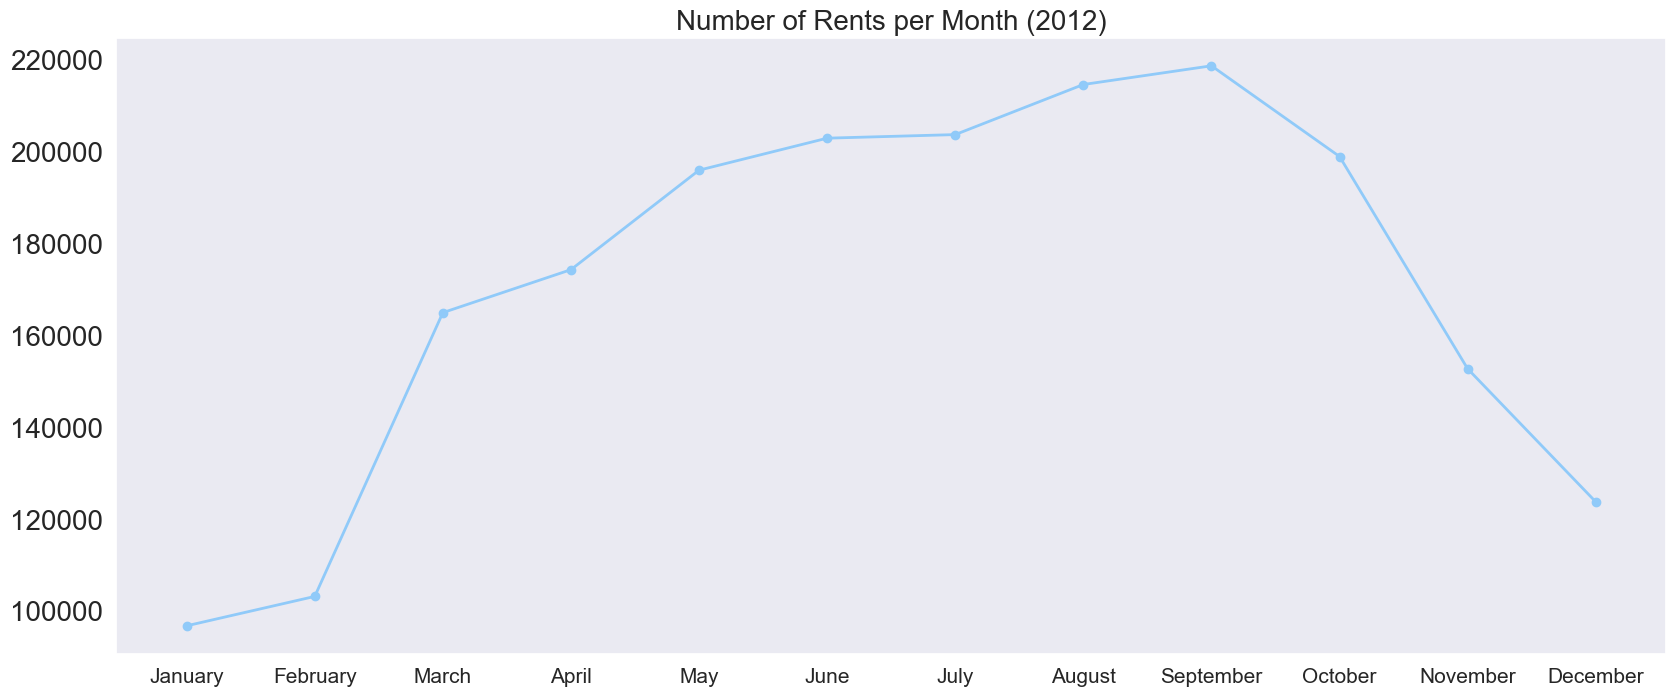

In [15]:
monthly_renter_df = day_df.resample(rule='M', on='dteday').agg({
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum",
    })
monthly_renter_df = monthly_renter_df.reset_index()
monthly_renter_df.rename(columns={
        "dteday": "date",
        "cnt": "rent_count"
    }, inplace=True)
monthly_renter_df
monthly_renter_df_2012 = monthly_renter_df[monthly_renter_df['date'] > pd.to_datetime("2011-12-31")]
monthly_renter_df_2012['date'] = monthly_renter_df_2012['date'].dt.strftime("%B")
plt.figure(figsize=(20, 8))
plt.plot(
    monthly_renter_df_2012['date'],
    monthly_renter_df_2012["rent_count"],
    marker='o',
    linewidth=2,
    color="#90CAF9"
)
plt.title("Number of Rents per Month (2012)", loc="center", fontsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.show()

dapat dilihat bahwa terjadi peningkatan dari bulan januari ke september, kemudian penurununan ke bulan desember. Hal ini bisa dipengaruhi oleh musim dan temperatur cuaca pada saat itu

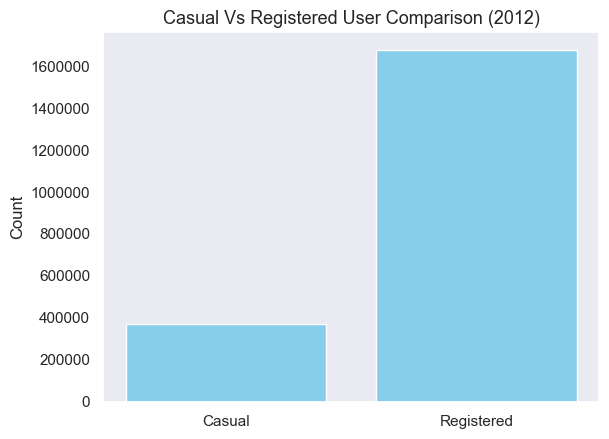

In [16]:
plt.bar(
    ('Casual', 'Registered'),
    (monthly_renter_df_2012['casual'].sum(), monthly_renter_df_2012['registered'].sum()),
    color='skyblue')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title("Casual Vs Registered User Comparison (2012)", loc="center", fontsize=13)
plt.ylabel('Count')
plt.show()

kita juga dapat melihat perbandingan perental casual dan registered pada tahun 2012

### Pertanyaan 2:

Pada jam berapa sepeda paling banyak dirental?

pada tahap ini saya membuat plot yang menunjukkan 5 jam dengan jumlah rental tertinggi.

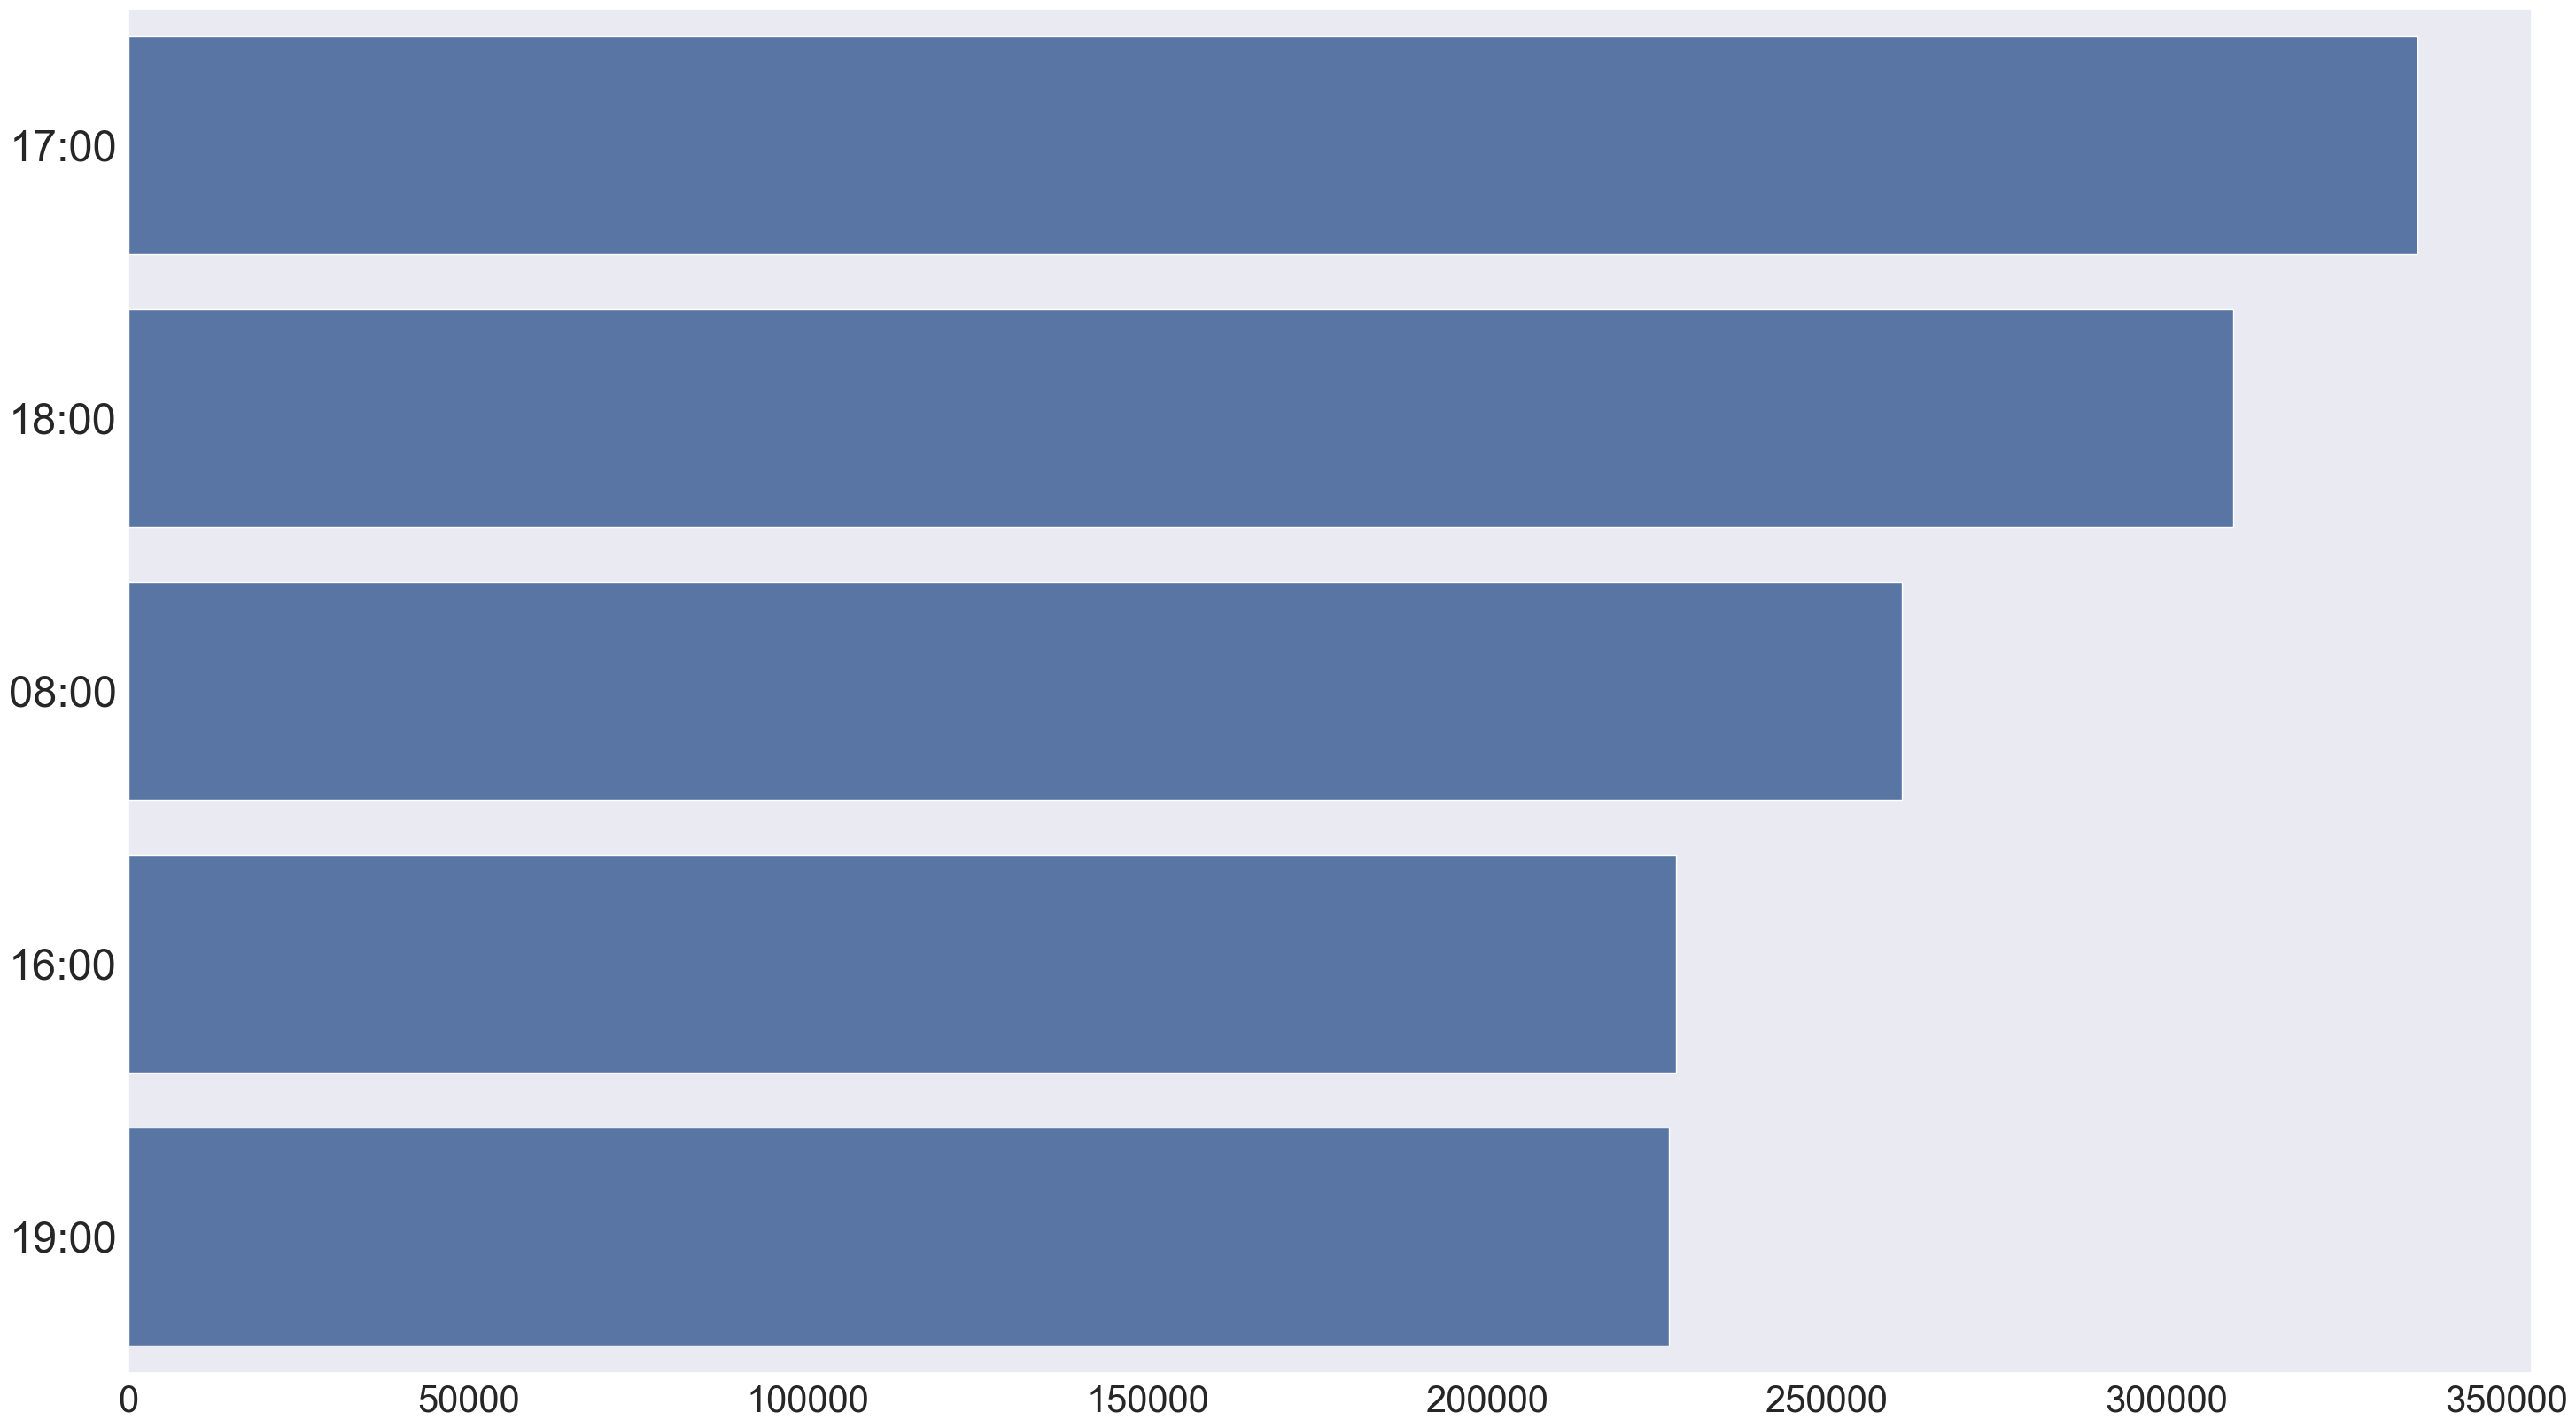

In [17]:
plt.figure(figsize=(35, 20))
sns.barplot(x="cnt", y="hr", data=busy.head(5))
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=35)
plt.tick_params(axis='x', labelsize=30)

### Pertanyaan 3:

Bagaimana pengaruh hari dan musim terhadap banyaknya sepeda yang dirental dalam rentang waktu tertentu?

disini saya membuat 2 plot yaitu berdasarkan musim dan berdasarkan hari. Perlu diingat bahwa plot disini ada keseluruhan data dan bukan dalam setahun.

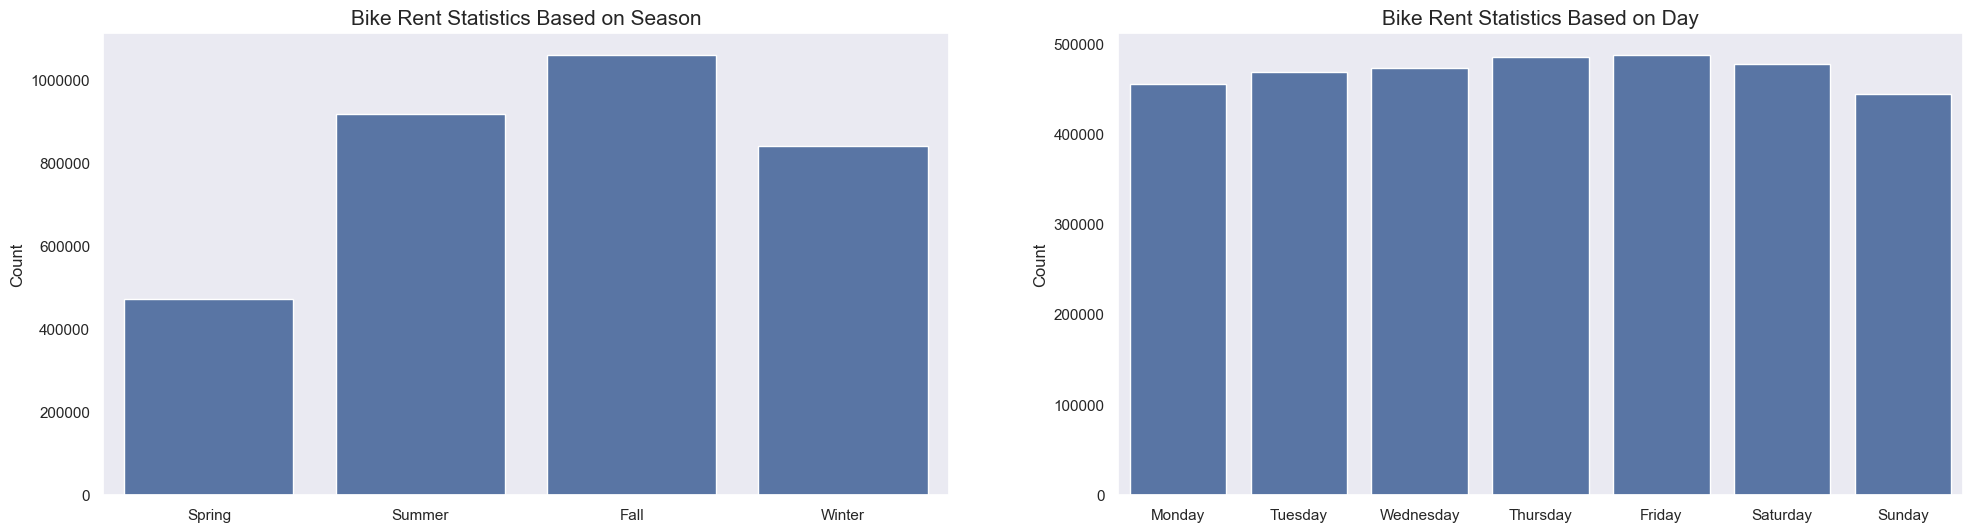

In [18]:
season = pd.DataFrame(day_df.groupby(by="season").cnt.sum())
season = season.reset_index()
season_order = ['Spring','Summer','Fall','Winter']
season['season'] = pd.Categorical(season['season'], categories=season_order, ordered=True)
season = season.sort_values('season')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
sns.barplot(x="season", y="cnt", data=season, ax=ax[0])
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('')
ax[0].set_title("Bike Rent Statistics Based on Season", loc="center", fontsize=15)

week_day = pd.DataFrame(day_df.groupby(by="weekday").cnt.sum())
week_day = week_day.reset_index()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
week_day['weekday'] = pd.Categorical(week_day['weekday'], categories=day_order, ordered=True)
week_day = week_day.sort_values('weekday')
sns.barplot(x="weekday", y="cnt", data=week_day, ax=ax[1])
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('')
ax[1].set_title("Bike Rent Statistics Based on Day", loc="center", fontsize=15)
plt.show()

### Pertanyaan 4:

Bagaimana pengaruh kondisi cuaca terhadap banyaknya sepeda yang dirental dalam rentang waktu tertentu?

disini saya menerapkan regresi sederhana dari temuan korelasi yang saya lakukan yaitu antara cnt(sepeda yang dirental) dan temp(temperatur)

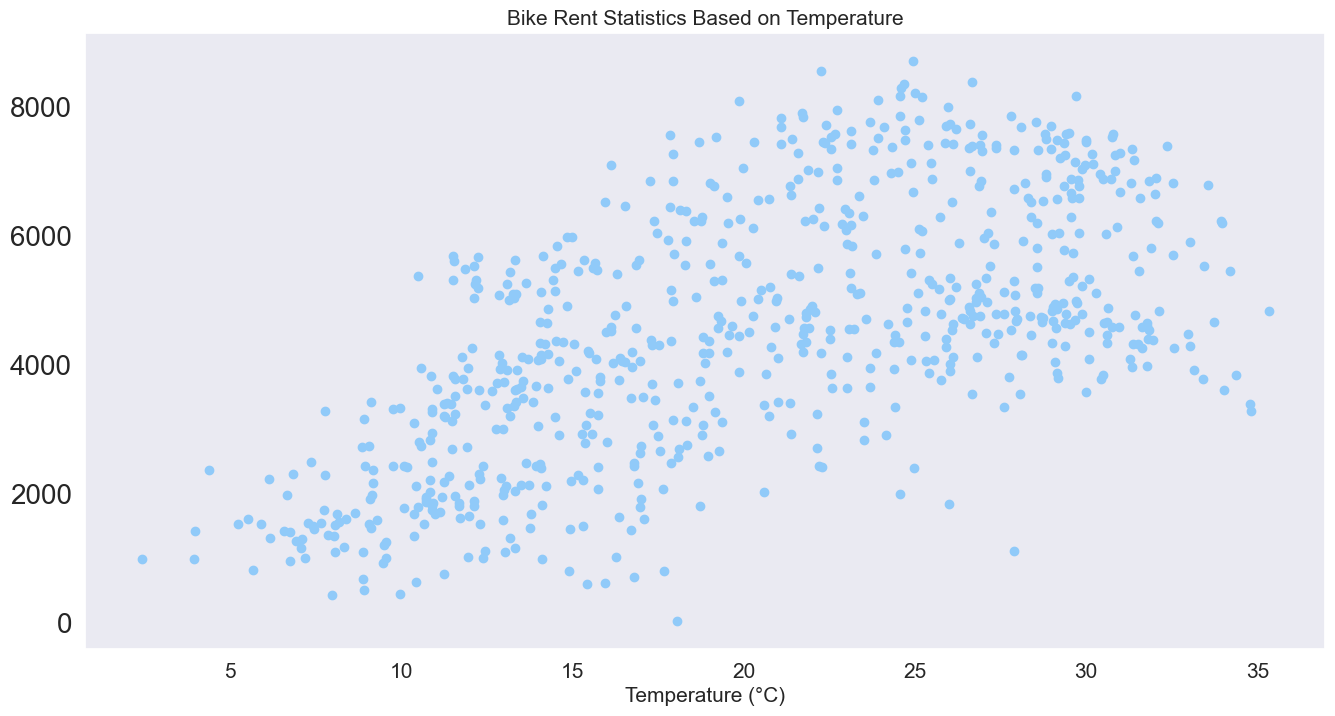

In [19]:
plt.figure(figsize=(16, 8))
plt.scatter(
    day_df["temp"]*41, #temperatur dalam data ternormalisasi dengan nilai max 41
    day_df["cnt"],
    marker='o',
    color="#90CAF9"
)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.title("Bike Rent Statistics Based on Temperature", loc="center", fontsize=15)
plt.xlabel('Temperature (°C)', fontsize=15)
plt.show()

meskipun data yang terlihat masih cukup tersebar, tapi bisa dilihat bahwa data memiliki trend yang menunjukkan bike rent semakin tinggi sewaktu suhu semakin tinggi, tetapi juga menurun kembali pada suhu sekitar 30°C - 35°C

## Conclusion

- Terdapat penurunan jumlah sepeda yang dirental pada bulan desember, hal ini bisa dikarenakan pengaruh musim semi yang mengakibatkan jalanan bersalju, dan juga temperatur yang tidak memungkinkan untuk bersepeda
- Sepeda paling banyak dirental pada jam 5 sore. Hal ini masuk akal mengingat orang orang lebih senang berolahraga di sore hari.
- Musim berpengaruh terhadap banyaknya sepeda yang dirental. Musim gugur menjadi musim terbaik untuk bersepeda karena suhu yang mendukung(tidak terlalu dingin dan tidak terlalu panas). jumlah rental sepeda sangat sedikit pada bulan musim semi, dikarenakan masih adanya pengaruh dari musim dingin seperti dijelaskan pada poin 1. Sementara hari tidak terlalu berpengaruh pada statistik rental sepeda.
- suhu memiliki pengaruh dalam banyaknya sepeda yang dirental. Semakin tinggi suhu maka akan semakin banyak sepeda yang dirental. Meskipun terdapat batas atas suhu yang ditolerir yaitu sekitar 30°C